In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize Pixels [0,1]
X_train = X_train /255
X_test = X_test/255

In [4]:
# Reshape
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

In [6]:
# Model Building

In [7]:
model = models.Sequential([layers.Conv2D(32,(3,3),
                                        activation='relu', input_shape = (28,28,1)),
                          layers.MaxPool2D(2,2), 
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),  #Hidden 
                          layers.Dense(10, activation='softmax')]) # Output layer

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Optimizer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
# Model Training 
history = model.fit(X_train,y_train, epochs = 7, validation_data = (X_test,y_test))

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9030 - loss: 0.3244 - val_accuracy: 0.9783 - val_loss: 0.0677
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.9832 - loss: 0.0562 - val_accuracy: 0.9831 - val_loss: 0.0496
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9895 - loss: 0.0349 - val_accuracy: 0.9853 - val_loss: 0.0474
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9928 - loss: 0.0241 - val_accuracy: 0.9852 - val_loss: 0.0485
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9942 - loss: 0.0181 - val_accuracy: 0.9847 - val_loss: 0.0508
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9863 - val_loss: 0.0468
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.9868 - val_loss: 0.0451


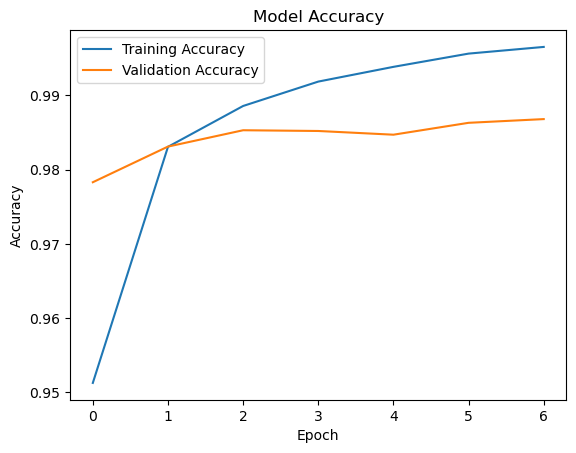

In [12]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()